In [79]:
import pandas as pd
import geopandas
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

import time, itertools

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, ShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, auc, confusion_matrix, precision_score, recall_score, roc_curve, f1_score 

## Load and clean data

In [2]:
df = pd.read_csv('../datasets/df_dummies2.csv',index_col=0)

In [3]:
df = df.rename(columns={'round_distance_0': 'dist<0.1_miles','round_distance_1': 'dist<0.2_miles','round_distance_2': 'dist<0.3_miles','round_distance_3': 'dist<0.4_miles','round_distance_4': 'dist<0.5_miles','round_distance_5': 'dist>0.5_miles'})

In [4]:
df[['RegionID','zip_code']] = df[['RegionID','zip_code']].astype('category')

In [5]:
pd.set_option('display.max_columns',320)

In [6]:
df = df.reset_index(drop=True)

In [7]:
df = df[df.above_median!=-1]
df.above_median = np.where(df.above_median==2,0,df.above_median)

In [27]:
df.shape

(154962, 285)

In [33]:
df2 = df.drop(columns=['station_103rd St', 'station_110th St', 'station_116th St', 'station_116th St - Columbia University', 'station_125th St', 'station_135th St', 'station_137th St - City College', 'station_138th St - Grand Concourse', 'station_145th St', 'station_149th St - Grand Concourse', 'station_14th St', 'station_155th St', 'station_157th St', 'station_15th St - Prospect Park', 'station_163rd St - Amsterdam Av', 'station_168th St', 'station_170th St', 'station_175th St', 'station_181st St', 'station_182nd-183rd Sts', 'station_18th Ave', 'station_18th St', 'station_190th St', 'station_191st St', 'station_1st Ave', 'station_20th Ave', 'station_23rd St', 'station_25th Ave', 'station_25th St', 'station_28th St', 'station_33rd St', 'station_34th St - Hudson Yards', 'station_34th St - Penn Station', 'station_36th St', 'station_3rd Ave', 'station_3rd Ave - 138th St', 'station_42nd St - Bryant Pk', 'station_42nd St - Port Authority Bus Term', 'station_45th St', 'station_47th-50th Sts - Rockefeller Ctr', 'station_49th St', 'station_4th Av - 9th St', 'station_50th St', 'station_51st St', 'station_53rd St', 'station_55th St', 'station_57th St', 'station_59th St', 'station_59th St - Columbus Circle', 'station_5th Ave - 53rd St', 'station_5th Ave - 59th St', 'station_5th Ave - Bryant Pk', 'station_62nd St', 'station_66th St - Lincoln Ctr', 'station_68th St - Hunter College', 'station_6th Ave', 'station_71st St', 'station_72nd St', 'station_75th St - Eldert Ln', 'station_77th St', 'station_79th St', 'station_7th Ave', 'station_81st St', 'station_82nd St - Jackson Hts', 'station_85th St - Forest Pky', 'station_86th St', 'station_8th Ave', 'station_8th St - NYU', 'station_96th St', 'station_9th Ave', 'station_Alabama Ave', 'station_Astor Pl', "station_Atlantic Av - Barclay's Center", 'station_Atlantic Ave', 'station_Ave H', 'station_Ave I', 'station_Ave J', 'station_Ave M', 'station_Ave N', 'station_Ave P', 'station_Ave U', 'station_Ave X', 'station_Bay 50th St', 'station_Bay Pky', 'station_Bay Ridge - 95th St', 'station_Bay Ridge Ave', 'station_Beach 25th St', 'station_Bedford - Nostrand Aves', 'station_Bedford Ave', 'station_Bergen St', 'station_Beverly Rd', 'station_Bleecker St', 'station_Borough Hall', 'station_Botanic Garden', 'station_Bowery', 'station_Bowling Green', 'station_Brighton Beach', 'station_Broad St', 'station_Broadway', 'station_Broadway - Lafayette St', 'station_Broadway Junction', 'station_Brooklyn Bridge - City Hall', 'station_Brooklyn College - Flatbush Ave', 'station_Burnside Ave', 'station_Bushwick - Aberdeen', 'station_Canal St', 'station_Canal St - Holland Tunnel', 'station_Canarsie - Rockaway Pkwy', 'station_Carroll St', 'station_Cathedral Pkwy (110th St)', 'station_Central Ave', 'station_Central Park North (110th St)', 'station_Chambers St', 'station_Chauncey St', 'station_Christopher St - Sheridan Sq', 'station_Church Ave', 'station_City Hall', 'station_Clark St', 'station_Classon Ave', 'station_Cleveland St', 'station_Clinton - Washington Aves', 'station_Coney Island - Stillwell Av', 'station_Cortelyou Rd', 'station_Cortlandt St', 'station_Court St', 'station_Crescent St', 'station_Crown Hts - Utica Ave', 'station_Cypress Hills', 'station_DeKalb Ave', 'station_Delancey St - Essex St', 'station_Ditmas Ave', 'station_Dyckman St', 'station_E 105th St', 'station_East Broadway', 'station_Eastern Pkwy - Bklyn Museum', 'station_Elmhurst Ave', 'station_Euclid Ave', 'station_Flushing Ave', 'station_Forest Hills - 71st Av', 'station_Franklin Ave', 'station_Franklin Ave - Fulton St', 'station_Franklin St', 'station_Freeman St', 'station_Fresh Pond Rd', 'station_Ft Hamilton Pkwy', 'station_Fulton St', 'station_Gates Ave', 'station_Graham Ave', 'station_Grand Army Plaza', 'station_Grand Ave - Newtown', 'station_Grand Central - 42nd St', 'station_Grand St', 'station_Grant Ave', 'station_Gravesend - 86th St', 'station_Greenpoint Ave', 'station_Halsey St', 'station_Harlem - 148 St', 'station_Herald Sq - 34th St', 'station_Hewes St', 'station_High St', 'station_Houston St', 'station_Hoyt - Schermerhorn Sts', 'station_Hoyt St', 'station_Jackson Hts - Roosevelt Av', 'station_Jay St - MetroTech', 'station_Jefferson St', 'station_Junius St', 'station_Kings Hwy', 'station_Kingston - Throop Aves', 'station_Kingston Ave', 'station_Knickerbocker Ave', 'station_Kosciuszko St', 'station_Lafayette Ave', 'station_Lexington Ave - 53rd St', 'station_Lexington Ave - 59th St', 'station_Lexington Ave - 63rd St', 'station_Liberty Ave', 'station_Livonia Ave', 'station_Lorimer St', 'station_Lower East Side - 2nd Ave', 'station_Marble Hill - 225th St', 'station_Marcy Ave', 'station_Metropolitan Ave', 'station_Middle Village - Metropolitan Ave', 'station_Middletown Rd', 'station_Montrose Ave', 'station_Morgan Ave', 'station_Myrtle - Wyckoff Aves', 'station_Myrtle Ave', 'station_Myrtle-Willoughby Aves', 'station_Nassau Ave', 'station_Neck Rd', 'station_Neptune Ave', 'station_Nevins St', 'station_New Lots Ave', 'station_New Utrecht Ave', 'station_Newkirk Ave', 'station_Norwood Ave', 'station_Nostrand Ave', 'station_Ocean Pkwy', 'station_Park Pl', 'station_Parkside Ave', 'station_Pennsylvania Ave', 'station_President St', 'station_Prince St', 'station_Prospect Ave', 'station_Prospect Park', 'station_Ralph Ave', 'station_Rector St', 'station_Rockaway Ave', 'station_Roosevelt Island - Main St', 'station_Saratoga Ave', 'station_Seneca Ave', 'station_Sheepshead Bay', 'station_Shepherd Ave', 'station_Smith - 9th Sts', 'station_South Ferry', 'station_Spring St', 'station_Sterling St', 'station_Sutter Ave', 'station_Sutter Ave - Rutland Road', 'station_Times Sq - 42nd St', 'station_Tremont Ave', 'station_Union Sq - 14th St', 'station_Union St', 'station_Utica Ave', 'station_Van Siclen Ave', 'station_Vernon Blvd - Jackson Ave', 'station_W 4th St - Washington Sq (Lower)', 'station_W 4th St - Washington Sq (Upper)', 'station_W 8th St - NY Aquarium', 'station_Wall St', 'station_Whitehall St', 'station_Wilson Ave', 'station_Winthrop St', 'station_Woodhaven Blvd', 'station_World Trade Center', 'station_York St'])

In [35]:
X = df2.drop(columns=['neighborhood','rent_estimate', 'median_nb_rents','num_within_dist','address','sale_date','sale_price','above_median','geometry','stat_lng','stat_lat','add_lng','add_lat','dist_miles'])
y = df2.above_median

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=4)

# Functions to Build Models, Print Metrics and Plot ROC Curve

In [38]:
def build_model(model, X_train, X_test, y_train, y_test, decision_function=True):
    start = time.time()
    
    clf = model
    clf.fit(X_train,y_train)
    print('Runtime: {} seconds'.format(time.time()-start))
    
    y_hat_test = clf.predict(X_test)
      
    #decision function is used for all models except random forest classifier    
    if decision_function==True:
        y_score = clf.decision_function(X_test)
    else:
        y_score = clf.predict_proba(X_test)[:, 1]
    print('Runtime: {} seconds'.format(time.time()-start))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('Total Runtime: {} seconds'.format(time.time()-start))
    
    return clf, y_hat_test, y_score, fpr, tpr, thresholds

#### Feature Importance

In [39]:
def plot_feature_importances(model):
    matplotlib.style.use('fivethirtyeight')
    n_features = len(X_train.columns[240:])
    plt.figure(figsize=(15,8))
    plt.barh(range(n_features), model.feature_importances_[240:], align='center') 
    plt.yticks(np.arange(n_features), X_train.columns[240:].values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

# def plot_feature_importances(model):
#     n_features = X_train.shape[1]
#     plt.figure(figsize=(8,8))
#     plt.barh(range(n_features), model.feature_importances_, align='center') 
#     plt.yticks(np.arange(n_features), df2.columns.values) 
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")

#### Confusion Matrix and Metrics

In [60]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    #Create the basic matrix.
    plt.imshow(cm, cmap)
    
    #Add title and Axis Labels
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    #Add appropriate Axis Scales
    class_names = set(y)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    #Add Labels to Each Cell
    thresh = cm.max() / 2.
    
    #Add a Side Bar Legend Showing Colors
    plt.colorbar()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

In [77]:
def print_model_metrics(y_pred,y_score):
    cm = confusion_matrix(y_test, y_pred)
    #print(cm)
    true_negative  = cm[0,0]
    false_positive = cm[0,1]
    false_negative = cm[1,0]
    true_positive  = cm[1,1]
    
    plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('Accuracy:   {}'.format(round(accuracy,4)))
    print('Precision:  {}'.format(round(precision,4)))
    print('Recall:     {}'.format(round(recall,4)))
    print('F1          {}'.format(round(f1,4)))
    print('AUC:        {}'.format(round(auc(fpr, tpr),4)))

#### ROC Curve

In [85]:
def plot_roc_curve(fpr, tpr):
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    #print('AUC: {}'.format(auc(fpr, tpr)))
    plt.figure(figsize=(10,8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([round(i/20.0,2) for i in range(21)])
    plt.xticks([round(i/20.0,2) for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


# Grid Search / Parameter Tuning

In [43]:
#Logistic Regression
log_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10] } 

#Random Forest
rf_param_grid = {"n_estimators": range(20, 100, 10),
                  "max_depth": range(4, 40, 4),
                  "min_samples_leaf": range(2, 100, 8),
                  "min_samples_split": range(2, 10,2),
                  "criterion": ["gini", "entropy"]
                }

#Gradient Boosting
gb_param_grid = {'n_estimators': [500],
                  'learning_rate':[0.01, 0.1, 1],
                  'max_depth': [2,3,4],
                  'min_samples_leaf': [2,5,10],
                  'min_samples_split': [2,5,10]
                }

#AdaBoost
ada_param_grid = { 'learning_rate':[0.001, 0.01, 0.1, 1],
                   "n_estimators": [5, 10, 50, 100, 250]
                 }

In [44]:
#grid search to tune each model to optimize parameters
def grid_search(clf, param_grid):
    
    start = time.time()

    param_grid = param_grid
    cv = ShuffleSplit(n_splits = 10, test_size = 0.25, random_state = 2)
    
    search = GridSearchCV(clf,param_grid,cv=cv,scoring='roc_auc')
    print('Runtime: {} seconds'.format(time.time()-start))
    
    search.fit(X_train,y_train)
    
    print("Total Runtime for Grid Search: {:.4} seconds".format(time.time() - start))
    print("Testing Accuracy: {:.4}%".format(search.best_score_ * 100))
    print("\nOptimal Parameters: {}".format(search.best_params_))
    

# LOGISTIC REGRESSION

In [45]:
## grid_search(LogisticRegression(),log_param_grid)

In [49]:
log_clf, log_y_pred, log_y_score, log_fpr, log_tpr, log_thresholds = build_model(LogisticRegression(C=.001), 
                                                         X_train, X_test, y_train, y_test,decision_function=True)

Runtime: 0.6726789474487305 seconds
Runtime: 0.9124789237976074 seconds
Total Runtime: 0.922109842300415 seconds


Accuracy:   0.6245
Precision:  0.6249
Recall:     0.9986
F1          0.7688
AUC:        0.5133


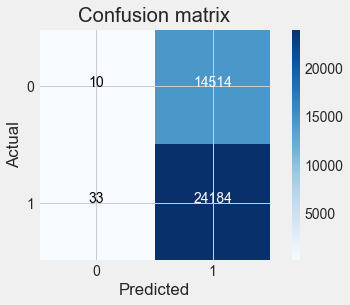

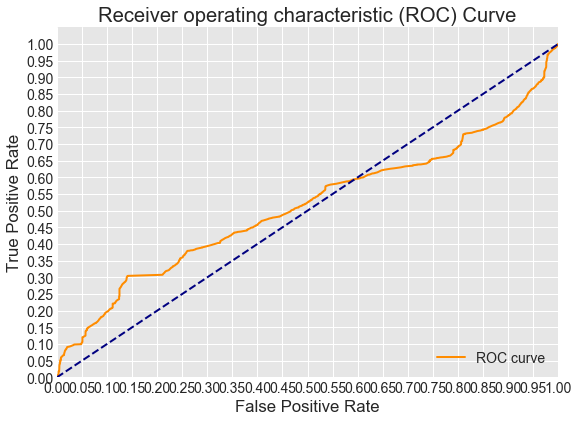

In [80]:
print_model_metrics(log_y_pred,log_y_score)
plot_roc_curve(log_fpr,log_tpr)

# RANDOM FOREST CLASSIFIER

In [52]:
#grid_search(RandomForestClassifier(),rf_param_grid)

In [75]:
rf_clf, rf_y_pred, rf_y_score, rf_fpr, rf_tpr, rf_thresholds = build_model(RandomForestClassifier(n_estimators=250,
                                                                                              criterion='gini',
                                                                                              min_samples_split=5,
                                                                                              min_samples_leaf=5,
                                                                                              random_state=2,
                                                                                              n_jobs=-1), 
                                                         X_train, X_test, y_train, y_test,decision_function=False)

Runtime: 17.249692916870117 seconds
Runtime: 19.199918031692505 seconds
Total Runtime: 19.208210945129395 seconds


Accuracy:   0.7452
Precision:  0.7633
Recall:     0.8587
F1          0.8082
AUC:        0.8157


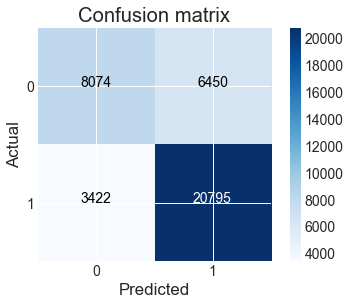

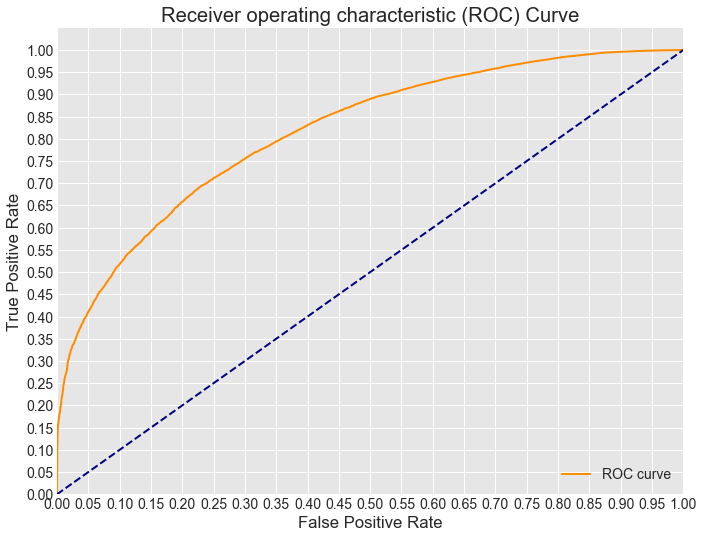

In [86]:
print_model_metrics(rf_y_pred,rf_y_score)
plot_roc_curve(rf_fpr,rf_tpr)

# GRADIENT BOOSTING CLASSIFIER

In [55]:
#grid_search(GradientBoostingClassifier(),gb_param_grid)

In [56]:
gb_clf, gb_y_pred, gb_y_score, gb_fpr, gb_tpr, gb_thresholds = build_model(GradientBoostingClassifier(), 
                                                         X_train, X_test, y_train, y_test,decision_function=True)

Runtime: 17.376792669296265 seconds
Runtime: 17.735549926757812 seconds
Total Runtime: 17.744908094406128 seconds


accuracy:   0.7091
precision:  0.7318
recall:     0.8441
F1          0.7839
AUC:        0.7683


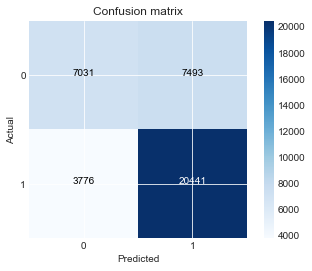

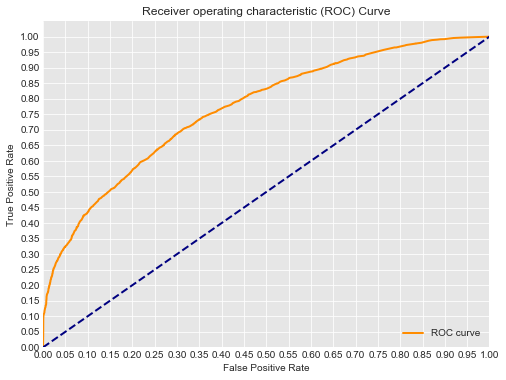

In [61]:
print_model_metrics(gb_y_pred,gb_y_score)
plot_roc_curve(gb_fpr,gb_tpr)

# ADABOOST CLASSIFIER

In [22]:
#grid_search(AdaBoostClassifier(),ada_param_grid)

#####RESULTS#####
# Runtime: 0.0004658699035644531 seconds
# Total Runtime for Grid Search: 6.435e+03 seconds
# Testing Accuracy: 75.86%

# Optimal Parameters: {'learning_rate': 1, 'n_estimators': 250}

Runtime: 0.0004658699035644531 seconds
Total Runtime for Grid Search: 6.435e+03 seconds
Testing Accuracy: 75.86%

Optimal Parameters: {'learning_rate': 1, 'n_estimators': 250}


In [58]:
ada_clf, ada_y_pred, ada_y_score, ada_fpr, ada_tpr, ada_thresholds = build_model(AdaBoostClassifier(
                                                                                learning_rate=1, n_estimators=250), 
                                                                                X_train, X_test, y_train, y_test,
                                                                                decision_function=True)

Runtime: 21.851635217666626 seconds
Runtime: 24.967839241027832 seconds
Total Runtime: 24.97516632080078 seconds


accuracy:   0.7032
precision:  0.734
recall:     0.8236
F1          0.7762
AUC:        0.7566


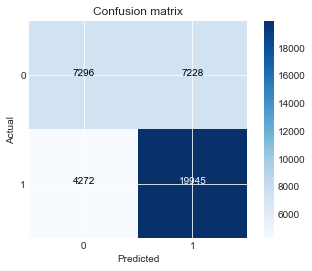

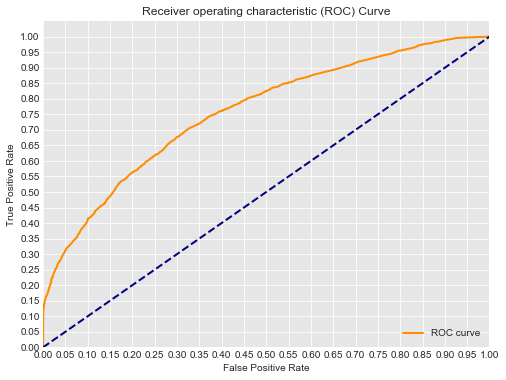

In [63]:
print_model_metrics(ada_y_pred,ada_y_score)
plot_roc_curve(ada_fpr,ada_tpr)
